<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/%5BE_05%5D_Who_do_I_look_like_Face_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Who Do I Look Like  - Korean Celebrities
Goal of this project:   
- Get used to the concept of **Face Embedding**: Preserving necessary information while transforming high-dimensional information into low-dimensional information,   
Then apply it to reflect **how similar the two faces are the distance** between the **face embedding vectors**
- Apply **FaceNet**: creates an embedding through **L2 normalization** behind the network and uses **Triplet Loss** here.   
- Learn how to calculate **Distance Metrics** btn **Face Embeddings**
- Visualize the **Face Embedding Space** (reduce dimensionality for visualization)
- Create an app "Who do I look like - Korean Celebrity"

# Dataset I used
- image files of Korean celebrities, not cropped


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 11 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=9417e00dc6bc0d49ae92d7540d281687858a90a0bc7b44e3a108ce71f7e2c8e4
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


Impot all the modules I need for this project.

In [ ]:
import face_recognition
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os


%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 1. Data Preparation

## (1) Load the celebrity dataset

Load the image dataset.

In [ ]:
import glob
my_image_path = '/content/drive/MyDrive/aiffel/EXP_5_data/celebrity/';


## Define the crop-face function

In [ ]:
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

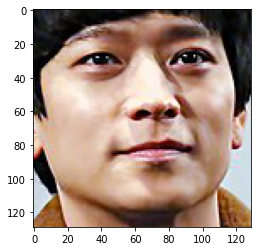

In [ ]:
image_path = '/content/drive/MyDrive/aiffel/EXP_5_data/celebrity/강동원.jpg';

cropped_face_chamchi = get_cropped_face(image_path)
plt.imshow(cropped_face_chamchi)

I can see Dong Won ChamChi's handomse face..    
So far so good!! 😍

## (2) Load my selfie images

I perpared 2 images, 1 for my past selfie (about 3 years ago when I had long haircut), and another for my current one with shorter hair.   
I want to see how the embedding is calculated differently for my same faces with younger / older face... but of course, since they are selfies, both faces look different even with human eyes.)

In [ ]:
selfie_path = '/content/drive/MyDrive/aiffel/EXP_5_data/'
selfie_1_path = os.path.join(selfie_path, 'selfie1.png');
selfie_2_path = os.path.join(selfie_path, 'selfie2.png');



<Figure size 576x360 with 0 Axes>

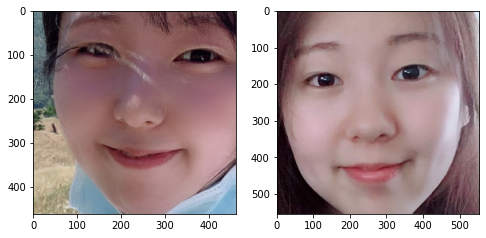

In [ ]:
selfie_1_cropped = get_cropped_face(selfie_1_path)
selfie_2_cropped = get_cropped_face(selfie_2_path)

plt.figure(figsize=(8,5))
ax1 = plt.subplot(1, 2, 1)
ax1 = plt.imshow(selfie_1_cropped)

ax2 = plt.subplot(1, 2, 2)
ax2 = plt.imshow(selfie_2_cropped)

plt.show()

Okay, both my faces are cropped well.   


## (3) Try calculating embeddings from the cropped face images

First I will calculate embedding for Dongwon ChamChi's face

In [ ]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


In [ ]:
embedding = get_face_embedding(cropped_face_chamchi)  
embedding

[array([-0.0291748 ,  0.11664836,  0.02454324,  0.00330246, -0.13348205,
        -0.07215101, -0.05855266, -0.11973654,  0.11163104, -0.0361887 ,
         0.23028068,  0.01080344, -0.14548065, -0.13027178, -0.05786713,
         0.14733383, -0.10559828, -0.20446461, -0.01887477,  0.00763196,
         0.12768915,  0.04665022,  0.04064208,  0.01630605, -0.14324932,
        -0.28085831, -0.08915681, -0.09161798,  0.00878481, -0.07073541,
        -0.06793194,  0.04791309, -0.24013424, -0.068512  ,  0.07502393,
         0.08725796,  0.01661829, -0.06022009,  0.16848357,  0.03279809,
        -0.22535616,  0.06579956,  0.08646952,  0.2515676 ,  0.25930315,
         0.05817603,  0.03744289, -0.12383052,  0.08841462, -0.09141211,
         0.09438062,  0.11488734,  0.1489428 ,  0.04386104, -0.02588407,
        -0.15860422,  0.0614039 ,  0.07894517, -0.17876634, -0.03287365,
         0.09710943, -0.06157432, -0.03681329, -0.03437827,  0.25913602,
         0.0338824 , -0.05236148, -0.22287378,  0.1

Next I will calculate embeddings for my two selfies.

In [ ]:
embedding_selfie_1 = get_face_embedding(selfie_1_cropped)  
embedding_selfie_1

[]

***Hmm.. The face_recognition.face_encodings returns an empty list!***    
   
   
That means it didn't find any faces in the image to encode. By default, it tries to locate a face in the image before it encodes it. Since your image is already cropped to the face area, you can pass in `known_face_locations=[(0, width, height, 0]]` to tell it where the face is.   
Ref for the fix: https://github.com/ageitgey/face_recognition/issues/490

In [ ]:
embedding_selfie_1 = face_recognition.face_encodings(selfie_1_cropped, known_face_locations=[(0, 500, 500, 0)])
embedding_selfie_1

[array([-9.09437388e-02,  7.73198456e-02,  1.16061568e-02, -9.29251611e-02,
        -1.57901168e-01, -4.53799032e-04, -6.20233640e-02, -4.19797637e-02,
         1.52549237e-01, -1.74440265e-01,  2.35182554e-01, -1.00793958e-01,
        -2.23185256e-01, -2.35408172e-02, -9.15523022e-02,  2.66415536e-01,
        -1.76976711e-01, -1.26280919e-01, -3.64764184e-02,  2.56819781e-02,
         5.29425554e-02,  9.40691829e-02, -7.69127756e-02,  5.41419350e-02,
        -1.48181319e-01, -3.07327867e-01, -6.65916428e-02, -6.03531897e-02,
        -1.58861019e-02, -1.17139108e-01, -2.08196528e-02,  9.43751410e-02,
        -1.23809651e-01,  1.04901437e-02,  1.51377022e-02,  6.63372353e-02,
        -1.59451533e-02, -8.10549855e-02,  1.41313255e-01,  4.67947945e-02,
        -3.15514028e-01,  1.50088891e-02,  8.38508904e-02,  2.82567769e-01,
         1.21361919e-01,  1.68287195e-04,  1.95828313e-03, -1.13801710e-01,
         7.27147609e-02, -2.11383060e-01, -4.94272113e-02,  1.04324326e-01,
         4.9

Ok I got the embeddings!

In [ ]:
embedding_selfie_2 = get_face_embedding(selfie_2_cropped)  
embedding_selfie_2

[array([ 7.40805827e-03,  5.30885868e-02, -5.23078442e-03, -9.09873992e-02,
        -1.37156159e-01, -5.32792807e-02, -6.31447285e-02, -1.25910267e-01,
         1.59124732e-01, -1.86114684e-01,  1.95543736e-01, -1.18830137e-01,
        -2.24988058e-01, -2.47773267e-02, -1.12904802e-01,  2.39204079e-01,
        -1.45868257e-01, -1.35532588e-01, -7.65965208e-02,  5.12237623e-02,
         9.65206027e-02,  3.26489173e-02, -6.24817610e-02,  5.31808361e-02,
        -1.00651912e-01, -3.12169373e-01, -1.05379790e-01, -5.81845269e-02,
        -5.59827238e-02, -1.03886031e-01, -2.19450854e-02,  7.80769438e-02,
        -1.07731558e-01,  7.21447915e-03,  2.90744901e-02,  4.56677750e-03,
         2.50353245e-04, -1.13921866e-01,  1.83432683e-01,  2.24111527e-02,
        -3.48641396e-01,  6.66181669e-02,  7.43979365e-02,  2.21140549e-01,
         1.51210234e-01, -3.41661125e-02,  1.70083307e-02, -2.04029322e-01,
         1.74342811e-01, -2.00481623e-01, -1.89438686e-02,  1.17168814e-01,
         8.7

## (4) Crop all celebrities' face

Now I need to crop every faces in the `celebrity` folder and save them to a new directory, so I can use them later.   
I will edit the `get_cropped_face` function to handle multiple image files.

### Error Handling for face_recognition

I added **Error Handling** for calculating the face_location.   
This is because for some celebrity images, the face_recognition cannot find the correct face location. I had to handle those situations so added `try, raise, catch` to handle

In [ ]:
# celebrities = glob.glob(my_image_path + "/*.jpg")
celebrities = os.listdir(my_image_path)
path_celebrities_cropped = '/content/drive/MyDrive/aiffel/EXP_5_data/celebrities_cropped';

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)

    if not face_locations:
      raise Exception("failed to get face_locations: ", image_file.split("/")[7])
      
    else:
      a, b, c, d = face_locations[0]
      cropped_face = image[a:c,d:b,:]
      return cropped_face

def get_cropped_face_save(my_image_path, path_celebrities_cropped):
    for celebrity in celebrities:
        img_path = os.path.join(my_image_path, celebrity)

        try:
          face = get_cropped_face(img_path)
        except Exception as inst:
          print("Exception: ", inst)
          continue
       
        pillow_image = Image.fromarray(face)
        pillow_image.save(path_celebrities_cropped +  "/" +celebrity)


In [ ]:
get_cropped_face_save(my_image_path, path_celebrities_cropped)

Exception:  ('failed to get face_locations: ', '산들.jpeg')


Okay, we cannot recognize 산들's face using this face_recognition function. Let's skip his face.

## (5) Create a Dictionary to store embeddings for all celebrities

I also added **Error Handling** for calculating the face_embeddings.   
This is because for some celebrity images, the face_embeddings cannot find the correct embeddings. I had to handle those situations so added `try, raise, catch` to handle

I also added `known_face_locations` parameter to prevent any missing locations

In [ ]:
def get_face_embedding_with_known_location(face):
    return face_recognition.face_encodings(face, known_face_locations=[(0, 500, 500, 0)])

In [ ]:
import matplotlib.image as mpimg

file_list = os.listdir(path_celebrities_cropped)
print('length of the celebrity images: ', len(file_list))

def get_face_embedding_dict(path_celebrities_cropped):
  file_list = os.listdir(path_celebrities_cropped)
  embedding_dict = {}

    
  for file in file_list:
    img_path = os.path.join(path_celebrities_cropped, file)
    face = mpimg.imread(img_path) # get cropped images

    try:
      embedding = get_face_embedding_with_known_location(face)
      if not embedding:
        print("failed to get face_embeddings: ", img_path.split("/")[7])
        raise Exception()
    except Exception as inst:
      continue

    if len(embedding) > 0:  
    # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
        embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
        
  return embedding_dict
embedding_dict = get_face_embedding_dict(path_celebrities_cropped)

length of the celebrity images:  285


In [ ]:
print("length of the embedding_dict: ", len(embedding_dict))

length of the embedding_dict:  268


In [ ]:
embedding_dict['강동원']

array([-3.78038920e-02,  1.08082764e-01,  9.69164893e-02, -1.01469643e-02,
       -8.35620388e-02, -3.30368504e-02, -5.62586188e-02, -1.62996352e-03,
        1.41005576e-01, -3.47798802e-02,  2.32784882e-01, -1.12455264e-02,
       -2.54156590e-01, -2.94470526e-02,  1.80307776e-04,  1.02750599e-01,
       -1.33897632e-01, -6.36224449e-02, -1.06232598e-01, -1.04612172e-01,
        3.28214541e-02,  2.33951341e-02,  2.68237293e-03,  7.30814785e-03,
       -9.04662237e-02, -2.94161737e-01, -7.47501701e-02, -1.22160524e-01,
        9.00673568e-02, -1.85409248e-01, -4.09657788e-03,  3.29107679e-02,
       -1.24632850e-01, -3.88873667e-02, -2.31719911e-02,  2.36463156e-02,
       -6.72334805e-04, -1.03435710e-01,  1.44793585e-01, -3.55616175e-02,
       -1.56446546e-01, -6.21719509e-02, -3.76119465e-03,  2.47416183e-01,
        1.72722220e-01,  2.82852836e-02,  1.63970049e-02, -4.81408983e-02,
        5.82552850e-02, -2.76277006e-01,  1.74573641e-02,  1.55662104e-01,
        1.67445801e-02,  

Looks like The embedding_dict is created correctly!

# 2. Distance Metrics between Face Embeddings

In the previous step, we already have all the face embeddings in the image we have. Now let's implement a function that calculates the distance between two embedding vectors. You can get it easily by using np.linalg.norm as seen above.   
   
The `get_distance()` function below takes two person names in the file name as arguments and **finds the distance (L2 distance) between the face embeddings of two people.**

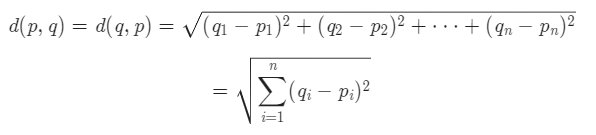

In [ ]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# 3. Visualization of Face Embedding Space

There are ways to **reduce dimensionality** to **visualize these multidimensional vectors, such as embeddings that change dimensional data to a lower dimension.** Examples include **PCA, T-SNE, etc** So let's see how the embeddings are laid out by visualizing them. TensorFlow's Projector allows you to visually see high-dimensional vectors using dimensionality reduction techniques.  

Refer to the [Embedding Projector](https://huyhoang17.github.io/128D-Facenet-LFW-Embedding-Visualisation/)

**PCA** checks the variance, which is the degree of change of values along the axes of all dimensions, and leaves the major axis with the largest change.   
[PCA](https://bcho.tistory.com/1209?category=555440)
   
**T-SNE** is a method of reducing the dimension so that it is placed farther in the high dimension and farther in the low dimension. First, you can understand it as an algorithm that randomly arranges data in a target dimension and then changes the position while comparing each data with the arrangement in a high dimension.
[T-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM)

# 4. Who do I look like?

Above, we defined four methods:   

- ` def get_cropped_face(image_file)` : function to get face area from image file
- `def get_face_embedding(face)` : function to get face embedding vector from face area
- `def get_face_embedding_dict(dir_path)` : A function to get an embedding dictionary of all images in a directory.
-` def get_distance(name1, name2)` : function to get embedding vector distance between two images (person names)

In [ ]:
# Create a function that compares the distance between name1 and name2, 
# but specify name1 in advance and receive name2 as an argument when called.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   

# This function sort_key_func computes the embedding vector distance between trump and obama when called sort_key_func('obama') .

In [ ]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('rank {} : name({}), distance({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    
    return sorted_faces

In [ ]:
sorted_faces = get_nearest_face('selfie1', 5)


rank 1 : name(selfie2), distance(0.39704726835247794)
rank 2 : name(승희), distance(0.4352037550441648)
rank 3 : name(지호), distance(0.4627624710042077)
rank 4 : name(잇지유나), distance(0.48356299746234765)
rank 5 : name(태연), distance(0.48596216612910986)


Oh Wow..! Actually It predicted that my selfie 1 is most alike with my selfie 2!! Nice estimation..!

# 5. Visualize the results

Define a helper function to show how the selfie is gradually overlayed with the celebrity image.

In [ ]:
def plot_the_face(selfie, sorted_faces):
  fig = plt.subplots(5, 4, figsize=(10, 10))
  cnt = 1

  selfie = cv2.cvtColor(selfie, cv2.COLOR_BGR2RGB)
  selfie = cv2.resize(selfie, (200, 200))

  for rank in range(1, 6):
    transparency = 0

    celeb_img = cv2.imread(path_celebrities_cropped + "/" + sorted_faces[rank][0] + ".jpg")
    celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
    celeb_img = cv2.resize(celeb_img, (200, 200))

    for i in range(4):
      overlapped = cv2.addWeighted(celeb_img, transparency, selfie, 1 - transparency,0)

      plt.subplot(5, 4, cnt)
      plt.imshow(overlapped)

      transparency += 0.25
      cnt += 1

Let's visualize the first selfie with the celebritie images

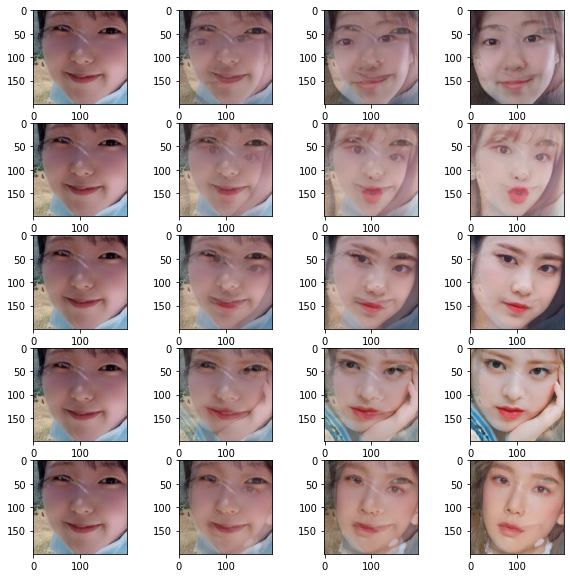

In [ ]:
selfie = cv2.imread(path_celebrities_cropped + '/selfie1.jpg')

plot_the_face(selfie, sorted_faces)


Let's visualize the first selfie with the celebritie images

In [ ]:
sorted_faces = get_nearest_face('selfie2', 5)


rank 1 : name(selfie1), distance(0.39704726835247794)
rank 2 : name(승희), distance(0.47967715376243986)
rank 3 : name(문별), distance(0.5014473457063449)
rank 4 : name(옥냥이), distance(0.5055542214010005)
rank 5 : name(지호), distance(0.5219508639121098)


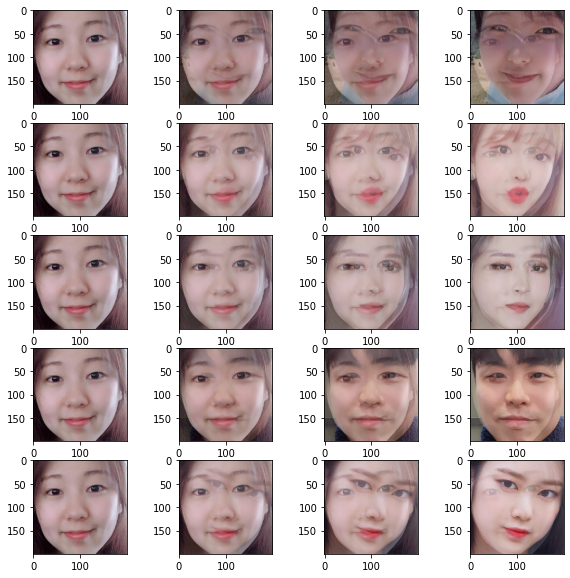

In [ ]:
selfie = cv2.imread(path_celebrities_cropped + '/selfie2.jpg')

plot_the_face(selfie, sorted_faces)

Wow, It predicted my selfie 2 is most alike with my selfie 1.   
There are a slight difference, but both lists contain 승희 and 지호 ;)   


One surprise thing was that the app says I look like "옥냥이", a guy I don't even know.

# 6. Conclusion

## 1. What I've learned

### (1) Face Embedding and Distance Metrics 
- Preserving necessary information while transforming high-dimensional information into low-dimensional information,   
- Then apply it to reflect **how similar the two faces are the distance** between the **face embedding vectors**

### (2) FaceNet
- creates an embedding through **L2 normalization** behind the network and uses **Triplet Loss** .   


## 2. Challenges I've faced
-  Error handling for the face_recognition and embeddings to preserve losing celebrity images was a little troublematic because that was happening in the nested function calls. I applied `try, raise, except` phrase to handle that.
- I had an issue drawing a 5 X 4 subplots. The plots got smaller as I move to the downside. I spent some time with the subplots and now I think I am much confident now with the subplots.

## 3. What to do further
- I want to try the **Face Recognition** part with `ArcFace` (instead of `FaceNet` I tried above). Currently, It is considered as the best scoring model. The nice thing of `ArcFace` is that it is easy to generalize and you can design other loss functions based on weight vectors including triplet losses and angular representations of features.
- Also, I want to try other **Distance Metrics**  available from `scikit-learn`: additive chi 2 kernel, euclidean distances, cosine similarities, manhatten_distances, paired_distances, ... etc.   
Ref for the full list from scikit-learn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

# References
- Various Face Recognition Models - Ranking: https://paperswithcode.com/sota/face-verification-on-labeled-faces-in-the
- list of the available distance metrics from `scikit-learn`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise